# Cats vs dogs
**Using convoluitonal neural networks to classify images as cats or dogs**

In this demonstration, we'll create a classifier using deep learning - CNN's to be specific.

In [2]:
# load libraries
from keras.models import load_model
from keras.preprocessing import image
import numpy as np
from os import listdir
from os.path import isfile, join
import matplotlib.pyplot as plt
import seaborn as sns

#theme and plots
sns.set_style('dark')
%matplotlib inline

Using TensorFlow backend.


In [3]:
# dimensions of our images
img_width, img_height = 224, 224

# load the model we saved
model = load_model('model.h5')
model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [4]:
# find directory and files
mypath = "predict/"
onlyfiles = [f for f in listdir(mypath) if isfile(join(mypath, f))]
print(onlyfiles)

['Ben_A.jpg', 'Ben_B.jpg', 'bunster.jpg', 'cat.505.jpg', 'cat.511.jpg', 'download.jpg', 'garfield.png', 'IMG_0282.jpg', 'IMG_0634.jpg', 'IMG_0912.jpg', 'IMG_1290.jpg', 'IMG_1337.jpg', 'IMG_1344.JPG', 'IMG_1449.jpg', 'IMG_20180617_123111585.jpg', 'IMG_20180831_181806551.jpg', 'IMG_20181127_210344911.jpg', 'IMG_5161.jpg', 'IMG_8779.jpg']


## Make predictions

1/1 [==============================] - 0s


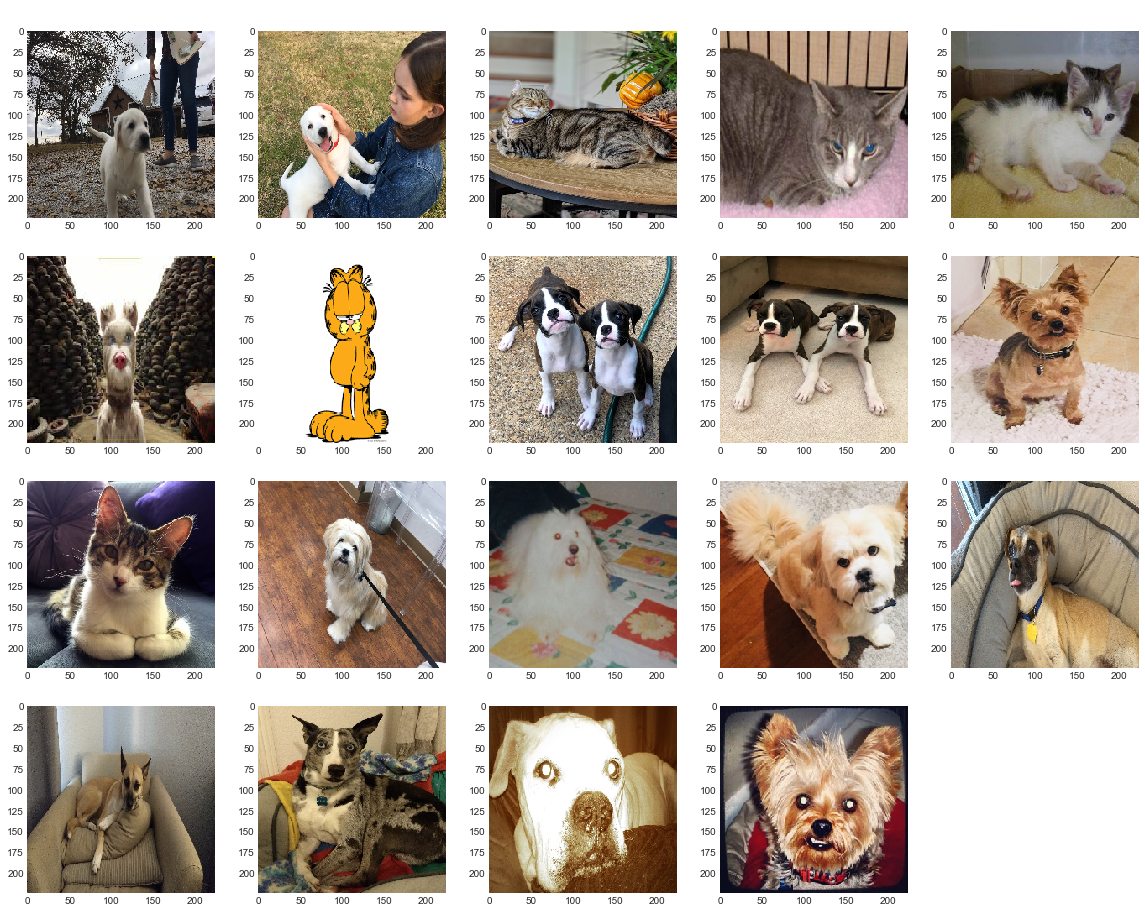

In [5]:
fig=plt.figure(figsize=(20, 20))
class_list = []
i=1
for file in onlyfiles:
    
    img = image.load_img(mypath+file, target_size=(img_width, img_height))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    
    images = np.vstack([x])
    
    classes = model.predict_classes(images, batch_size=10)
    classes_temp = classes[0][0]
    
    if classes_temp == 0:
        class_list = "cat"
    else:
        class_list = "dog"
    #plot    
    font = {'family': 'serif',
        'color':  'white',
        'weight': 'normal',
        'size': 24,
        }
    sp = fig.add_subplot(5,5,i)
    plt.imshow(img)
    sp.set_title(class_list, fontdict=font)
    i=i+1
    


Shout out to Claudia, Brad and Ben for their pets' pics!

## Visualize layer activations as filters

In [6]:
from keras.models import Model

layer_outputs = [layer.output for layer in model.layers]
activation_model = Model(inputs=model.input, outputs=layer_outputs)
 
def display_activation(activations, col_size, row_size, act_index): 
    activation = activations[act_index]
    activation_index=0
    fig, ax = plt.subplots(row_size, col_size, figsize=(row_size*4,col_size*4))
    for row in range(0,row_size):
        for col in range(0,col_size):
            ax[row][col].imshow(activation[0, :, :, activation_index], cmap='jet')
            activation_index += 1

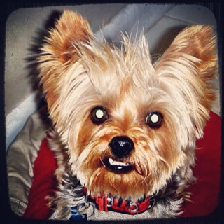

In [11]:
# original image
img_layer = image.load_img(mypath+'IMG_8779.jpg', target_size=(img_width, img_height))
activations = activation_model.predict(np.expand_dims(image.img_to_array(img_layer), axis=0))
img_layer

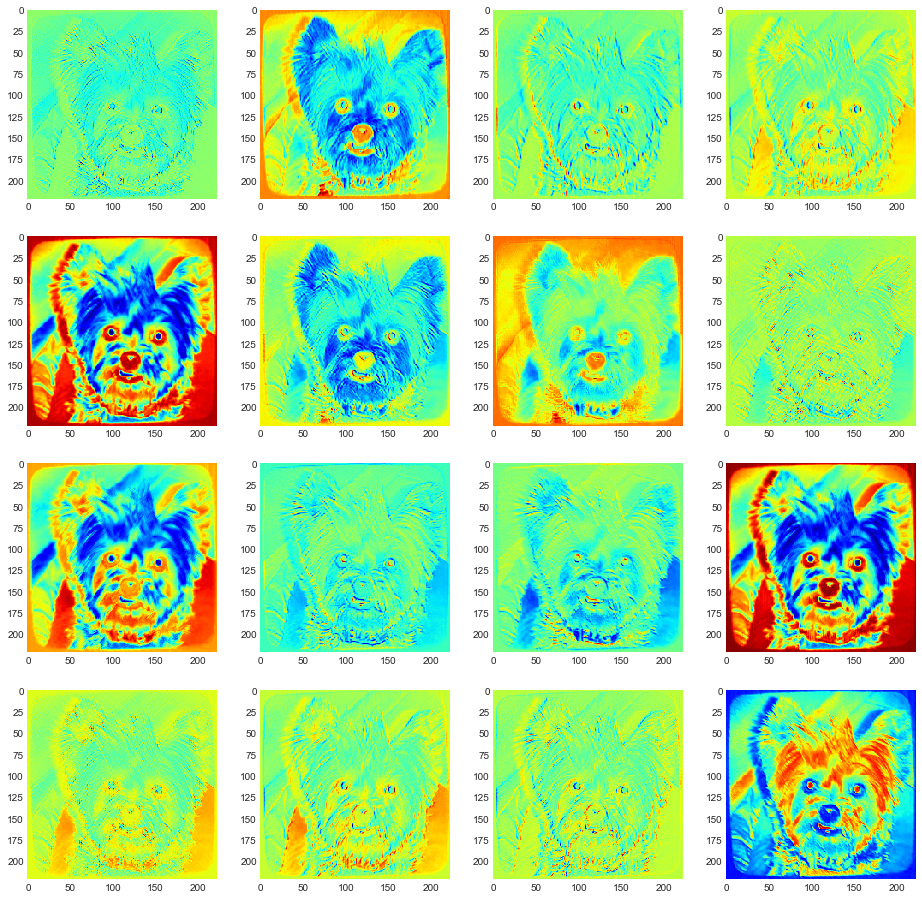

In [12]:
# First layer
display_activation(activations, 4, 4, 0)

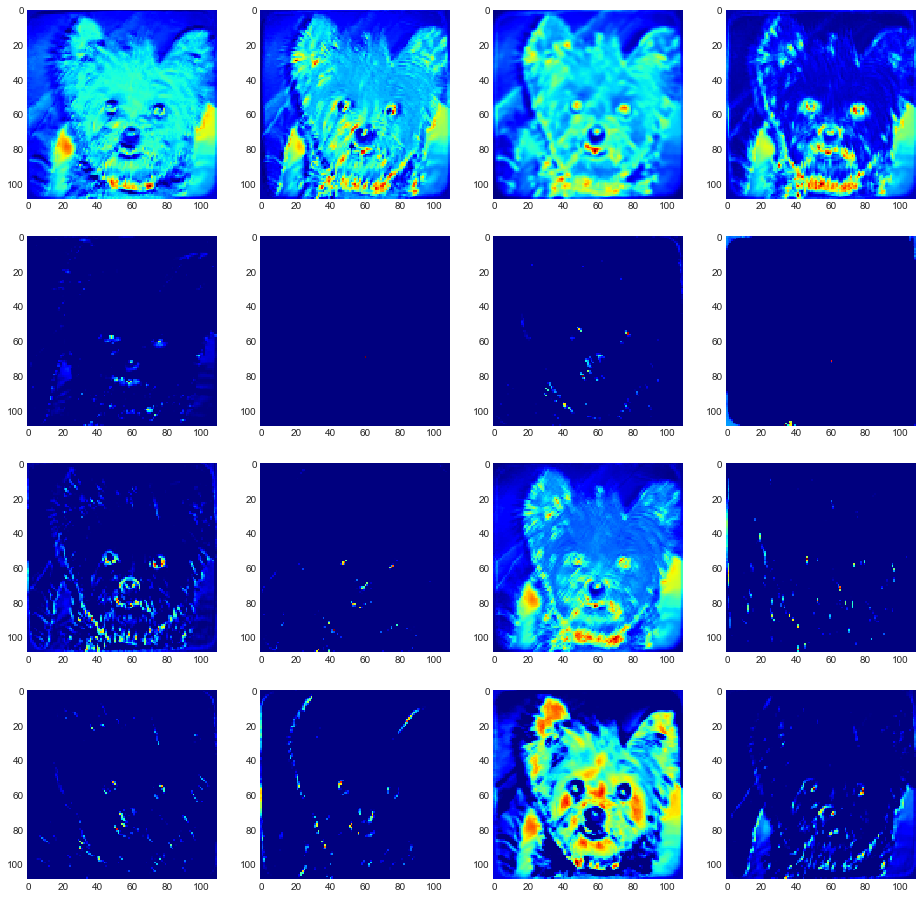

In [13]:
# 6th layer
display_activation(activations, 4, 4, 4)